Autor: Renan Tonolli Mondini - RA: 191010324 <br><hr>
# Método da Bisecção
 Considerando a função $f(x) = ln(x) – 2sen(x)$ e a equação $f(x) = 0$.

Inicialmente, importa-se as bibliotecas

In [1]:
import math
import numpy as np
import sympy
x = sympy.symbols('x')

Definindo as funções e plotando a intersecção de $ln(x)$ e $2sen(x)$

In [2]:
def f1(x):
    return sympy.ln(x)
def f2(x):
    return 2*sympy.sin(x)

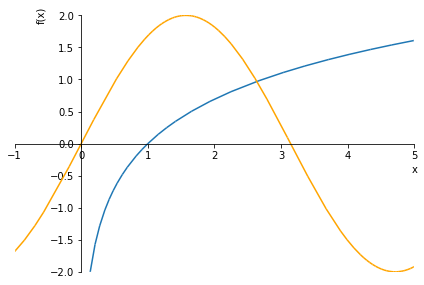

In [3]:
f1_plot = sympy.plotting.plot(f1(x),xlim=(-1,5),ylim=(-2,2), show=False)
f2_plot = sympy.plotting.plot(f2(x), line_color = 'orange', show=False)
f1_plot.append(f2_plot[0])
f1_plot.show()

Define-se o intervalo $[a,b]$ como $[2,3]$

In [4]:
a = 2
b = 3
e = 1 * 10**-2
x_k1 = 0

Função que decide qual limite substituir por $x_k$

In [5]:
def escolher_lado(f_a, f_x, b, a, x_k1, x_k):
    if f_a*f_x < 0:
        b = x_k
    else:
        a = x_k

    x_k1 = x_k
    return a, b, x_k1

Definindo o erro relativo como restrição <font size='10'> $\frac{|x_k-x_{k-1}|}{max\{x_{k-1},1\}}$ </font> 

In [6]:
def erro_relativo(x_k, x_k1, max_xk_1, e):
    return abs(x_k - x_k1)/max_xk_1 >= e

Realizando as iterações, tem-se:

In [7]:
def metodo_biseccao(a, b, e, x_k1):
    eh_1_iteração = True
    i = 0
    while True:

        x_k = (a + b)/2
        f_x = f1(x_k) - f2(x_k)
        f_a = f1(a) - f2(a)
        i+=1
        
        if eh_1_iteração and abs(f_x) >= e:
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)
            eh_1_iteração = False

        if x_k1 < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = x_k1

        if not eh_1_iteração and (abs(f_x) >= e or erro_relativo(x_k, x_k1, max_xk_1, e) ):
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)

        else: 
            break
    return x_k, i

In [8]:

x_k, i = metodo_biseccao(a, b, e, x_k1)
print(f'{x_k:.6f}')
i

2.632812


7

*Após 7 iterações pode-se concluir que $x_k = 2,632812$*.

# Metodo da Falsa Posição

Definindo as funções e plotando a intersecção de $x^3+3$ e $9x$

In [9]:
def f1(x):
    return x**3+3
def f2(x):
    return 9*x

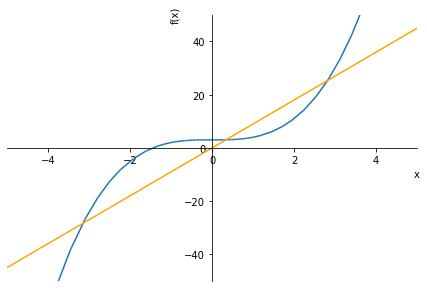

In [10]:
f1_plot = sympy.plotting.plot(f1(x),xlim=(-5,5),ylim=(-50,50), show=False)
f2_plot = sympy.plotting.plot(f2(x), line_color = 'orange', show=False)
f1_plot.append(f2_plot[0])
f1_plot.show()

Define-se o intervalo $[a,b]$ como $[2,3]$

In [11]:
a = 2
b = 3
e = 1 * 10**-3
x_k1 = 0

Utilizando a mesma equação do erro relativo como restrição $\frac{|x_k-x_{k-1}|}{max\{x_{k-1},1\}}$, bem como a equação que decide qual limite substituir por $x_k$, calculamos pelo método da falsa posição.

In [12]:
def metodo_falsa_posicao(a, b, e, x_k1):
    eh_1_iteração = True
    i = 0
    while True:

        f_a = f1(a) - f2(a)
        f_b = f1(b) - f2(b)
        x_k = (a * f_b - b * f_a)/(f_b - f_a)
        f_x = f1(x_k) - f2(x_k)
        i+=1
        
        if eh_1_iteração and abs(f_x) >= e:
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)
            eh_1_iteração = False

        if x_k1 < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = x_k1

        if not eh_1_iteração and (abs(f_x) >= e or erro_relativo(x_k, x_k1, max_xk_1, e) ):
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)

        else: 
            break
    return x_k, i

In [13]:
x_k, i = metodo_falsa_posicao(a, b, e, x_k1)
print(f'{x_k:.6f}')
i

2.816903


5

*Após 5 iterações pode-se concluir que $x_k = 2,816903$*.